In [81]:
#dataset
import mnist

#display
import matplotlib.pyplot as plt

# Model
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

#misc
from sklearn.model_selection import train_test_split
import numpy as np

from PIL import Image

In [149]:
train_images = mnist.train_images() / 255
train_labels = mnist.train_labels()

test_images = mnist.test_images() / 255
test_labels = mnist.test_labels()

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

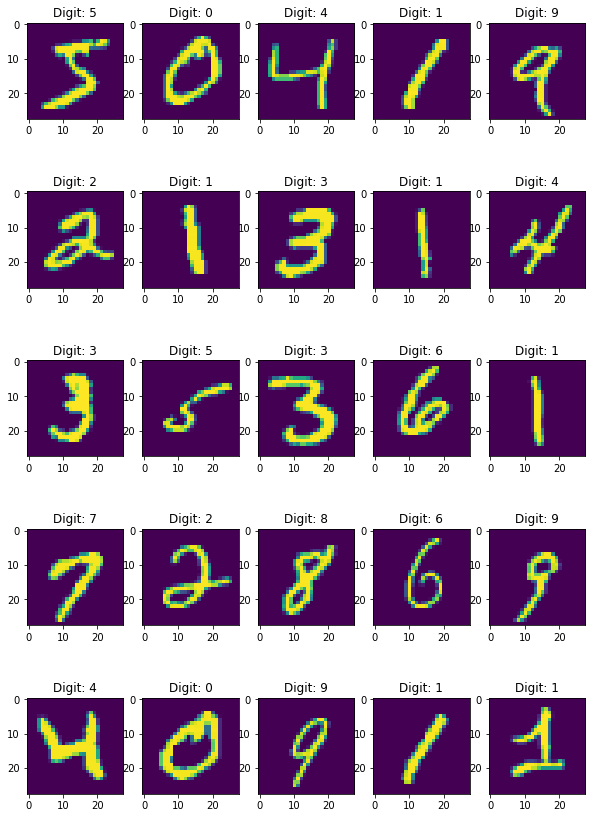

In [92]:
plt.figure(figsize=(10,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    img = train_images[i]
    plt.title("Digit: {}".format(train_labels[i]))
    plt.imshow(img)
plt.show()

Taking architecture from Lenet5:
<img src="images/Lenet5.png">

In [147]:
model = models.Sequential()
conv_size = 5
pooling_size = 2

# adding conv and max Pooling layers
model.add(layers.Conv2D(6,conv_size,input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pooling_size))

model.add(layers.Conv2D(16,conv_size))
model.add(layers.MaxPooling2D(pooling_size))

model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84))
model.add(layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_42 (Dense)             (None, 84)              

In [151]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=12,
    validation_data=(test_images, to_categorical(test_labels))
)

Epoch 1/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0558 - val_accuracy: 0.9853
Epoch 2/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0661 - val_accuracy: 0.9830
Epoch 3/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0529 - val_accuracy: 0.9865
Epoch 4/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0615 - val_accuracy: 0.9872
Epoch 5/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0592 - val_accuracy: 0.9866
Epoch 6/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0791 - val_accuracy: 0.9825
Epoch 7/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0574 - val_acc

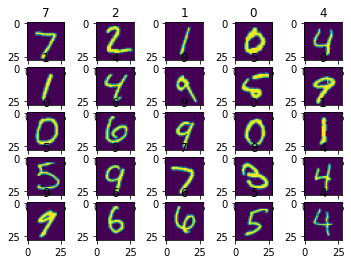

In [139]:
test_images = mnist.test_images() / 255

for i in range(25):
    plt.subplot(5,5,i+1)
    img = test_images[i]
    res = np.argmax(model.predict(img.reshape(1,28,28,1)))
    plt.title(res)
    plt.imshow(img)
    
plt.show()